# Принятие решений в бизнесе на основе данных

**Описание проекта**  

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### 1. Загрузим данные


В файле **/datasets/hypothesis.csv** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами **Reach, Impact, Confidence, Effort.** 

**Задача:**    
Применить фреймворк **ICE** для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
Применить фреймворк **RICE** для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
Указать, как изменилась приоритизация гипотез при применении **RICE** вместо **ICE**. Объяснить, почему так произошло.  


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy.stats as stats
import math as mth
import datetime as dt

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option("max_colwidth", 150)

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк **ICE:**

In [4]:
hypothesis.index = hypothesis.index + 1
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Самые перспективные гипотезы **9, 1 и 8**

Применим фреймворк **RICE:**

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Самые перспективные гипотезы с индексами **8, 3, 1**

Из тройки лидеров выпала **9** гипотеза, все потому что для анализа в фреймворке **RICE** появляется параметр **Reach**, а он у гипотезы **9** имеет показатель **1** (крайне низкий)

### 2.  Анализ A/B-теста

**Задача:**  

Проанализируйте A/B-тест:  

* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.  
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.  
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.  
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.  
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.  
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.  
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.  
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  

Примите решение по результатам теста и объясните его. Варианты решений:    
1. Остановить тест, зафиксировать победу одной из групп.   
2. Остановить тест, зафиксировать отсутствие различий между группами.   
3. Продолжить тест.  

Загрузим данные:

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Более детально посмотрим на данные и изучим их:

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders[['transactionId','visitorId']].duplicated().sum()

0

In [10]:
orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: visitorId, Length: 1031, dtype: int64

In [11]:
orders[orders['visitorId'] == 4256040402]

,transactionId,visitorId,date,revenue,group
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
588,3700356838,4256040402,2019-08-20,17650,A
873,2519737434,4256040402,2019-08-08,58220,B
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.duplicated().sum()

0

#### 2.1 Построим график кумулятивной выручки по группам

Создаем массив уникальных пар значений дат и групп теста:

In [15]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [16]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 
      'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [17]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                      visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 
         'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique,
         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

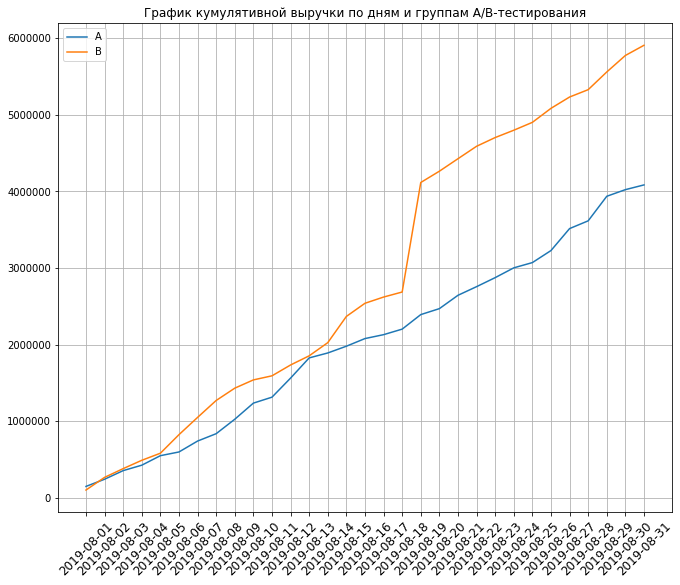

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(11,9))
plt.xticks(rotation=45, fontsize=12)
plt.title("График кумулятивной выручки по дням и группам A/B-тестирования")

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend() 
plt.show()

**Вывод:** группа **В** доминирует на всей дистанции, кроме самого начала, несколько дней держался паритет. **18.08.21** произошел резкий всплеск, это связано либо с резким ростом числа заказов, либо с появлением очень дорогих заказов в выборке.

#### 2.2.Построим график кумулятивного среднего чека по группам

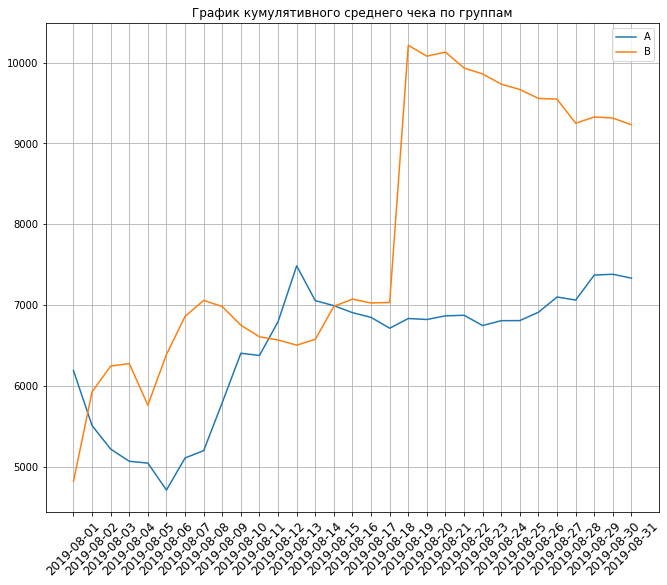

In [20]:
plt.figure(figsize=(11,9))
plt.xticks(rotation=45, fontsize=12)
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("График кумулятивного среднего чека по группам")
plt.legend()
plt.show()

**Вывод:** а вот и причина скачка **18.08.21** на графике **кумулятивной выручки** - появились дорогие заказы.

#### 2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A

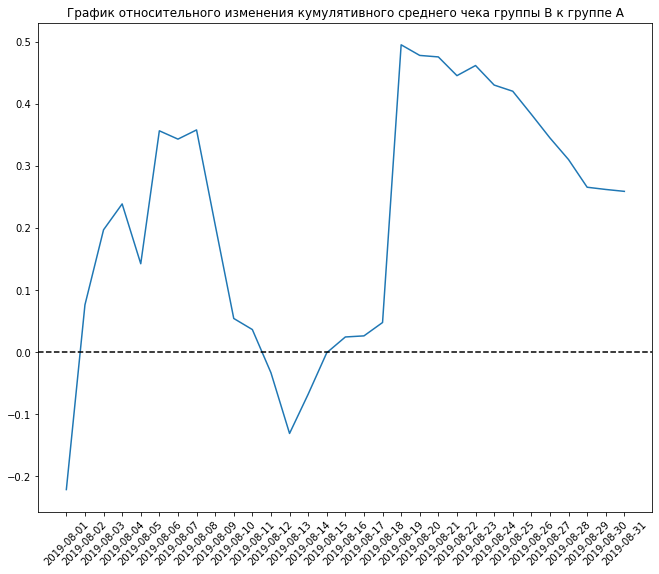

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date',
    right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(11,9))
plt.xticks(rotation=45, fontsize=10)
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
             mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Вывод:** судя по графику, однозначно есть выбросы и крупные заказы, скачки очень серьезные.

#### 2.4 Построим график кумулятивной конверсии по группам

In [22]:
cumulativeData['date'].min(), cumulativeData['date'].max()

('2019-08-01', '2019-08-31')

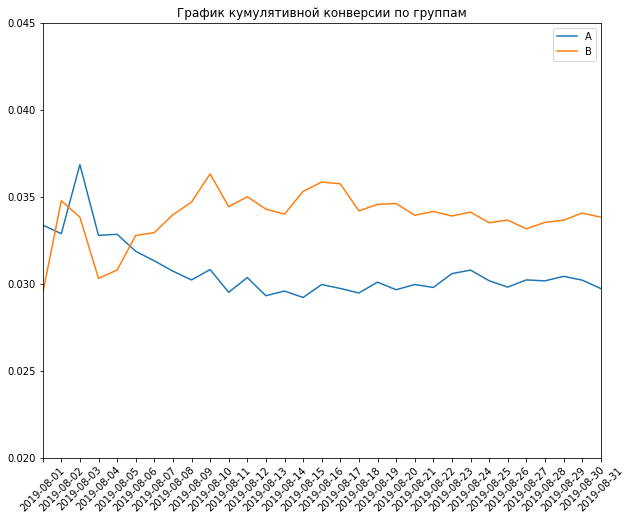

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,8))
plt.xticks(rotation=45, fontsize=10)
plt.title("График кумулятивной конверсии по группам")

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.045])
plt.legend()
plt.show()

**Вывод:** несколько дней группа **А** доминировала, но затем окончательно группа **В** выбилась в лидерство по **конверсии** и больше не уступала группе **А**.

#### 2.5 Построим график относительного изменения кумулятивной конверсии группы B к группе A

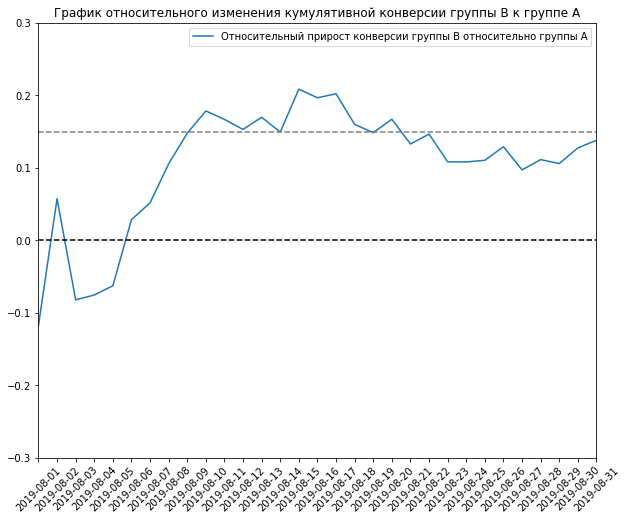

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,8))
plt.xticks(rotation=45, fontsize=10)
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3]) 
plt.legend()
plt.show()

**Вывод:** вначала группа **В** проигрывала, но затем вышла вперед с существенным отрывом.

#### 2.6 Построим точечный график количества заказов по пользователям 

In [25]:
ordersbyusers =  orders.groupby('visitorId', as_index=False).agg({'transactionId': 'count'})
ordersbyusers.columns = ['userId', 'orders']
ordersbyusers.sort_values(by='orders', ascending=False)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


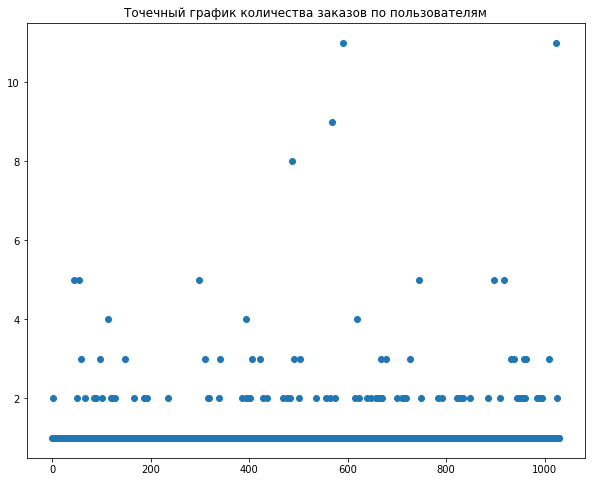

In [26]:
x_values = pd.Series(range(0,len(ordersbyusers)))
plt.figure(figsize=(10,8))
plt.title("Точечный график количества заказов по пользователям")
plt.xticks(fontsize=10)
plt.scatter(x_values, ordersbyusers['orders']) 
plt.show()

**Вывод:** много пользователей с 2-3 заказами

#### 2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [27]:
print(np.percentile(ordersbyusers['orders'], [95, 99]))

[2. 4.]


**Вывод:** нижнюю границу определим, как **4** заказа.

#### 2.8 Построим точечный график стоимостей заказов

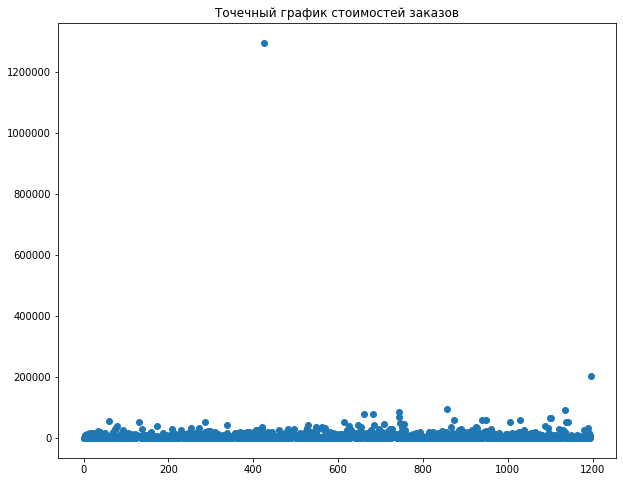

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,8))
plt.xticks(fontsize=10)
plt.title("Точечный график стоимостей заказов")
plt.scatter(x_values, orders['revenue'])
plt.show()

**Вывод:** дорогих заказов крайне мало.

#### 2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [29]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Вывод:** нижнюю границу определим, как **28000**.

#### 2.10 Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Подготовим данные:

In [30]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Сформируем **нулевую** и **альтернативную** гипотезу для каждого задания: 
    
1. **Нулевая** гипотеза для теста **конверсии** гласит - конверсии групп **А** и **В** не различаются.  
   **Альтернативная** гипотеза - различаются.  
      
2. **Нулевая** гипотеза для теста **среднего чека** гласит - средний чек групп **А** и **В** не различается.  
   **Альтернативная** гипотеза - различается.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Создадим переменные **ordersByUsersA** и **ordersByUsersB** со столбцами **userId и orders**. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные **sampleA** и **sampleB**, в которых пользователям из разных групп будет соответствовать количество заказов.    
Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием **Манна-Уитни.**

In [33]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [34]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


**Вывод:**   
Первое число — **p-value = 0.017 < 0.05.** Значит, **нулевую гипотезу** о том, что статистически значимых различий в конверсии между группами нет, **отвергаем.**   
Относительный выигрыш группы **B** равен **13.8%** — второе число в выводе.

#### 2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [35]:
print('{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue'], alternative="two-sided")[1]))
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


**Вывод:**     
**P-value больше 0.05.** Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы **B** выше среднего чека группы **A.**

#### 2.12 Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

In [36]:
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [37]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape)

(68,)


В ходе очистки данных выявился **68** аномальный пользователь.

Подготовим выборки количества заказов по пользователям по группам теста:

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [40]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.022
0.146


**Вывод:**     
**P-value увеличился, но он все еще ниже 0.05.** Разница между сегментами **B** и **A** увеличилась незначительно.

#### 2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [41]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative="two-sided"
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.918
-0.023


**Вывод:**     
**P-value увеличился, он выше 0.05, мы не можем отвергнуть нулевую гипотезу**. Отношение между сегментами **B** / **A** теперь со знаком минус.

#### 2.14 Примите решение по результатам теста и объясните его

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Результаты:**

до очистки  |  после  

**конверсия**                  
**p-value:** 0.017 |  0.022   
**отношение групп:** 0.138  |  0.146   

**ср.чек**     
**p-value:** 0.729 |  0.918   
**отношение групп:** 0.259  |  -0.023  

**Конверсия:**

До очистки данных **p-value** был **меньше 0.05**, после очистки **p-value** остался таковым, поэтому мы признаем существование статистически значимой разницы **конверсий.** Отношение конверсий двух групп изменилось после очистки не сильно, группа **B** на **14.6%** лучше.

**Средний чек:**    

При анализе данной метрики получилось увидеть наглядно разницу между конечными результатами **сырых** и **очищенных** данных и как **выбросы** могут влиять на результаты. Отношение средних чеков после очистки данных изменилось в пользу группы **А.**  

До очистки данных **p-value** был **больше 0.05** и мы не могли сказать, что существует статистическая разница между **ср.чеками** двух групп, после очистки **p-value** так же остался выше порогового значения и мы не смогли отвергнуть нулевую гипотезу.

### 3. Общий вывод

По **конверсии** оказалась лучше группа **B** на целых **14.6%**, статистически значимая разница подтверждена.  
По **среднему чеку** группа **А** лучше на **2.3%**, но подтвердить существование статистически значимой разницы в этом тесте не получилось.

**Решение:** Остановить тест, зафиксировать победу группы **B**